# 数据预处理
Created by Vulcan626 on 2023/12/27

In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:

# 加载数据集
file_path = 'BeijingPMData/BeijingPM20100101_20151231.csv'
df0 = pd.read_csv(file_path)
df0.head()


,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [50]:

# 基本数据探索
df0.info()
df0.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               52584 non-null  int64  
 1   year             52584 non-null  int64  
 2   month            52584 non-null  int64  
 3   day              52584 non-null  int64  
 4   hour             52584 non-null  int64  
 5   season           52584 non-null  int64  
 6   PM_Dongsi        25052 non-null  float64
 7   PM_Dongsihuan    20508 non-null  float64
 8   PM_Nongzhanguan  24931 non-null  float64
 9   PM_US Post       50387 non-null  float64
 10  DEWP             52579 non-null  float64
 11  HUMI             52245 non-null  float64
 12  PRES             52245 non-null  float64
 13  TEMP             52579 non-null  float64
 14  cbwd             52579 non-null  object 
 15  Iws              52579 non-null  float64
 16  precipitation    52100 non-null  float64
 17  Iprec       

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,25052.000000,20508.000000,24931.000000,50387.000000,52579.000000,52245.000000,52245.000000,52579.000000,52579.000000,52100.000000,52100.000000
mean,26292.500000,2012.499772,6.523962,15.726609,11.500000,2.491100,89.154439,92.560806,88.643737,95.904241,2.074554,54.602421,1016.465442,12.587040,23.261829,19.258683,19.519008
std,15179.837614,1.707485,3.448452,8.798896,6.922252,1.116988,87.239267,88.027434,88.041166,91.643772,14.222059,25.991338,10.295070,12.098527,49.281706,4381.035532,4381.036040
min,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,1.000000,-40.000000,2.000000,991.000000,-19.000000,0.450000,0.000000,0.000000
25%,13146.750000,2011.000000,4.000000,8.000000,5.750000,1.000000,24.000000,28.000000,24.000000,27.000000,-10.000000,31.000000,1008.000000,2.000000,1.790000,0.000000,0.000000
50%,26292.500000,2012.000000,7.000000,16.000000,11.500000,2.000000,64.000000,68.000000,62.000000,69.000000,2.000000,55.000000,1016.000000,14.000000,4.920000,0.000000,0.000000
75%,39438.250000,2014.000000,10.000000,23.000000,17.250000,3.000000,124.000000,127.000000,122.000000,132.000000,15.000000,78.000000,1025.000000,23.000000,21.020000,0.000000,0.000000
max,52584.000000,2015.000000,12.000000,31.000000,23.000000,4.000000,737.000000,672.000000,844.000000,994.000000,28.000000,100.000000,1046.000000,42.000000,585.600000,999990.000000,999990.000000


(0.0, 300.0)

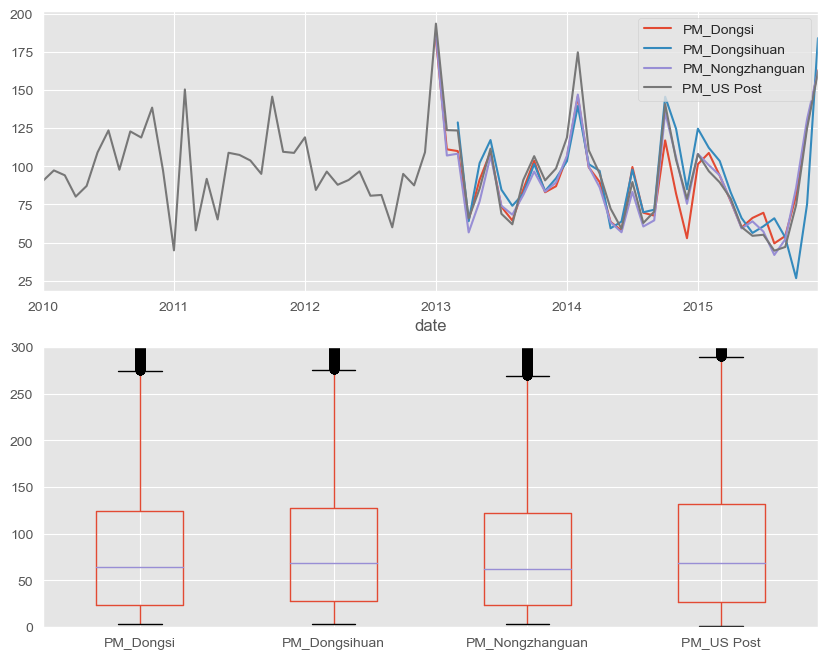

In [51]:
# 规范数据集和添加所需要的新列

# 将年、月、日、小时合并成 datetime 类型的索引
dateparse = lambda dates: datetime.strptime(dates, '%Y %m %d %H')
df = pd.read_csv(file_path, parse_dates = {'date': ['year','month','day','hour']},date_parser=dateparse,index_col = 'date', keep_date_col = True)

#使用weekday()方法将日期转成对应的周几
def getweekday(x):
    Week_Day = x.weekday()
    return Week_Day
df['weekday'] = list(df.reset_index().date.apply(getweekday))

#提取是否周末的信息，1为周末，0为工作日
def getweekend(x):
    if x >= 5:
        Weekend = 1
    else:
        Weekend = 0
    return Weekend
df['weekend'] = df['weekday'].apply(getweekend)

# 露点与温度的差值
df['diff'] = df['DEWP'] - df['TEMP']

#首先观察三个监测点测得的PM2.5的趋势
fig,axes = plt.subplots(2,1,figsize = (10,8))
df[['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post']].resample('M').mean().plot(ax = axes[0])
df.boxplot(column = ['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post'])
axes[1].set_ylim(0,300)

In [52]:

# 检查缺失值
missing_values = df.isnull().sum()
missing_values


No                     0
year                   0
month                  0
day                    0
hour                   0
season                 0
PM_Dongsi          27532
PM_Dongsihuan      32076
PM_Nongzhanguan    27653
PM_US Post          2197
DEWP                   5
HUMI                 339
PRES                 339
TEMP                   5
cbwd                   5
Iws                    5
precipitation        484
Iprec                484
weekday                0
weekend                0
diff                   5
dtype: int64

In [53]:
# 缺失值处理

# 大量缺失的特征（如PM_Dongsi、PM_Dongsihuan、PM_Nongzhanguan）：这些特征的缺失值数量非常大，可能选择删除这些列，特别是如果它们与其他PM测量（如PM_US Post）高度相关的话。
columns_to_drop = ['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan']
df.drop(columns=columns_to_drop, inplace=True)

# 较少缺失的特征（如DEWP、HUMI、PRES、TEMP、cbwd、Iws）：这些特征的缺失值较少，可以选择用均值或中位数填充（对于数值型数据），或者用最频繁的值填充（对于分类数据）。
numeric_columns = ['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec']
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

# 轻微缺失的特征（如precipitation、Iprec）：这些特征的缺失值相对较少，同样可以选择用均值或中位数填充。
categorical_columns = ['cbwd']
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# 检查更新后的缺失值状态
updated_missing_values = df.isnull().sum()
updated_missing_values


No                  0
year                0
month               0
day                 0
hour                0
season              0
PM_US Post       2197
DEWP                0
HUMI                0
PRES                0
TEMP                0
cbwd                0
Iws                 0
precipitation       0
Iprec               0
weekday             0
weekend             0
diff                5
dtype: int64

In [54]:
# 方法1: 使用相近时间点的值填充PM_US Post列中的缺失值。这是通过先向前填充（ffill），然后向后填充（bfill）实现的，确保所有缺失值都被替代。
df_time_fill = df.copy()
df_time_fill['PM_US Post'] = df_time_fill['PM_US Post'].fillna(method='ffill').fillna(method='bfill')

# 方法2: 使用PM_US Post列的均值填充其缺失值。
df_mean_fill = df.copy()
df_mean_fill['PM_US Post'] = df_mean_fill['PM_US Post'].fillna(df_mean_fill['PM_US Post'].mean())

# 检查更新后的缺失值状态
updated_missing_values_time_fill = df_time_fill.isnull().sum()
updated_missing_values_mean_fill = df_mean_fill.isnull().sum()

(updated_missing_values_time_fill, updated_missing_values_mean_fill)


(No               0
 year             0
 month            0
 day              0
 hour             0
 season           0
 PM_US Post       0
 DEWP             0
 HUMI             0
 PRES             0
 TEMP             0
 cbwd             0
 Iws              0
 precipitation    0
 Iprec            0
 weekday          0
 weekend          0
 diff             5
 dtype: int64,
 No               0
 year             0
 month            0
 day              0
 hour             0
 season           0
 PM_US Post       0
 DEWP             0
 HUMI             0
 PRES             0
 TEMP             0
 cbwd             0
 Iws              0
 precipitation    0
 Iprec            0
 weekday          0
 weekend          0
 diff             5
 dtype: int64)

Skewness: 1.886246
Kurtosis: 5.286269


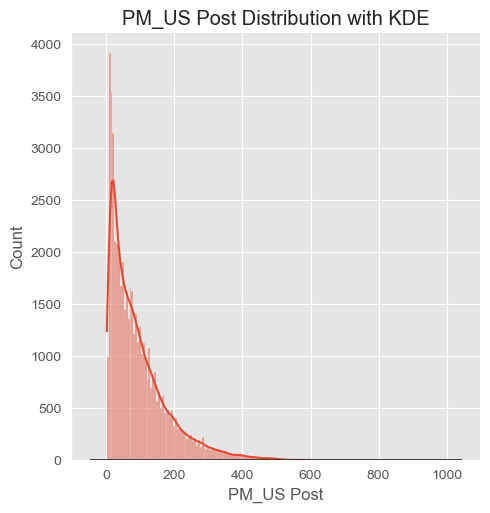

In [55]:
# time_fill
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# 使用 displot 绘制直方图和核密度估计
sns.displot(df_time_fill['PM_US Post'], kde=True)
plt.title('PM_US Post Distribution with KDE')

# 叠加正态分布曲线
mean, std = norm.fit(df_time_fill['PM_US Post'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

print("Skewness: %f" % df_time_fill['PM_US Post'].skew())
print("Kurtosis: %f" % df_time_fill['PM_US Post'].kurt())

plt.show()


Skewness: 1.910781
Kurtosis: 5.413451


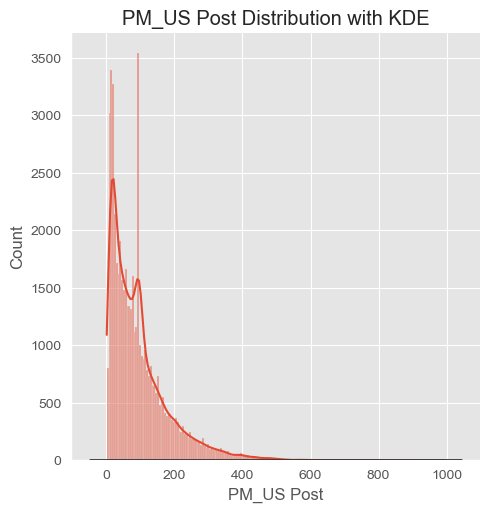

In [56]:
# mean_fill
# 使用 displot 绘制直方图和核密度估计
sns.displot(df_mean_fill['PM_US Post'], kde=True)
plt.title('PM_US Post Distribution with KDE')

# 叠加正态分布曲线
mean, std = norm.fit(df_mean_fill['PM_US Post'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

print("Skewness: %f" % df_mean_fill['PM_US Post'].skew())
print("Kurtosis: %f" % df_mean_fill['PM_US Post'].kurt())

plt.show()


数据的偏度（Skewness）和峰度（Kurtosis）反映了其分布的特征：
- 偏度：接近2的值表示数据分布是正偏的，也就是说大多数数据值集中在左侧，右侧的尾部较长。
- 峰度：值大于3意味着数据分布比正态分布的尾部更重，呈现出尖峰态。

由此可见，df_time_fill和df_mean_fill两个数据集的偏度和峰度都相似，这表明它们的分布形态相近，都有正偏性（右偏）和重尾特征。根据时间填充的数据集的偏度和峰度更平滑且更接近于正态分布，因此我们将使用这个数据集进行后续分析。

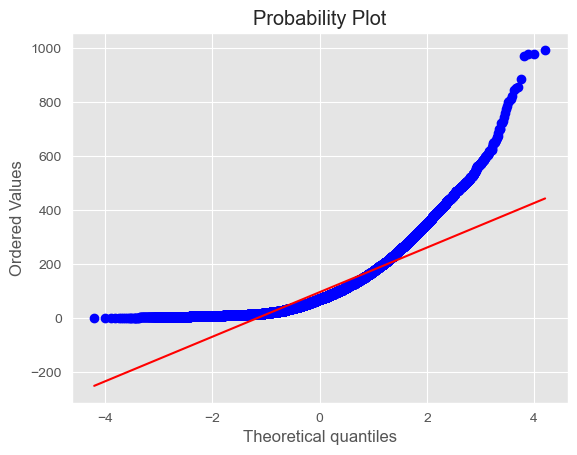

In [57]:
# 线性分布可能性检测
from scipy import stats
fig = plt.figure()
res = stats.probplot(df_time_fill['PM_US Post'], plot=plt)

In [58]:
# log转换
# 查看0值
df_time_fill[df_time_fill['PM_US Post']==0].shape

(0, 18)

Skewness: -0.369796
Kurtosis: -0.499659


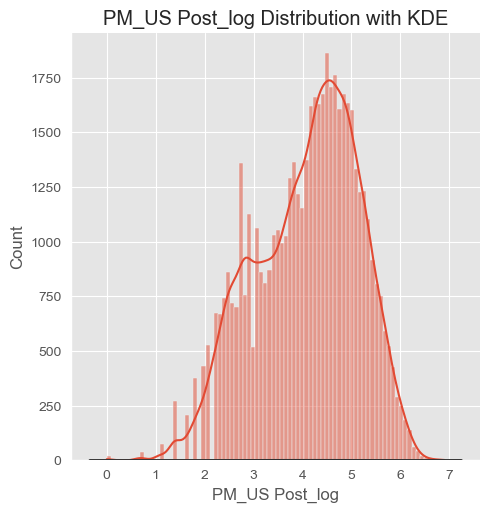

In [59]:
df_time_fill['PM_US Post_log'] = np.log(df_time_fill['PM_US Post'])

sns.displot(df_time_fill['PM_US Post_log'], kde=True)
plt.title('PM_US Post_log Distribution with KDE')

# 叠加正态分布曲线
mean, std = norm.fit(df_time_fill['PM_US Post_log'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

print("Skewness: %f" % df_time_fill['PM_US Post_log'].skew())
print("Kurtosis: %f" % df_time_fill['PM_US Post_log'].kurt())

plt.show()


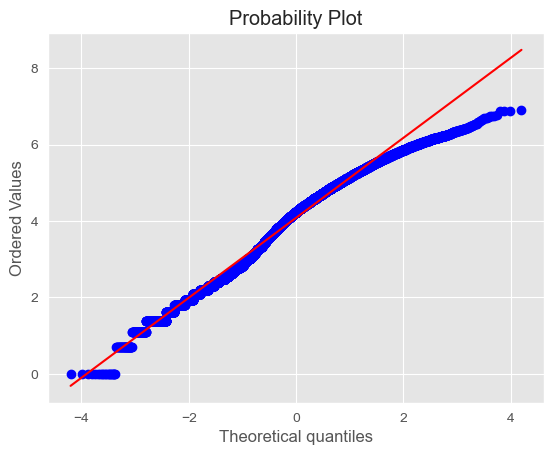

In [60]:
# 线性分布可能性检测
res = stats.probplot(df_time_fill['PM_US Post_log'], plot=plt)

<AxesSubplot:xlabel='DEWP', ylabel='PM_US Post_log'>

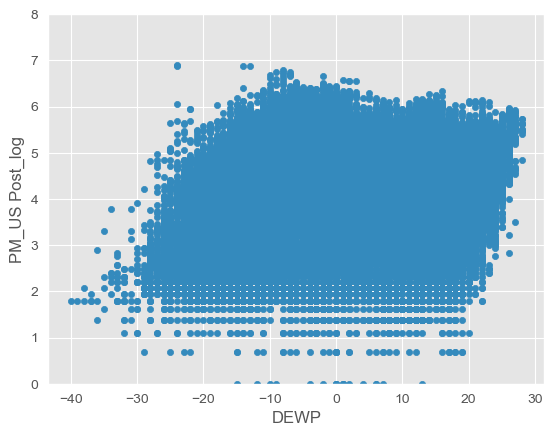

In [62]:
# 查看各个特征与PM_US Post_log的相关性
import pandas as pd
# DEWP
var = 'DEWP'
data = pd.concat([df_time_fill['PM_US Post_log'], df_time_fill[var]], axis=1)
data.plot.scatter(x=var, y='PM_US Post_log', ylim=(0, 8))

<AxesSubplot:xlabel='HUMI', ylabel='PM_US Post_log'>

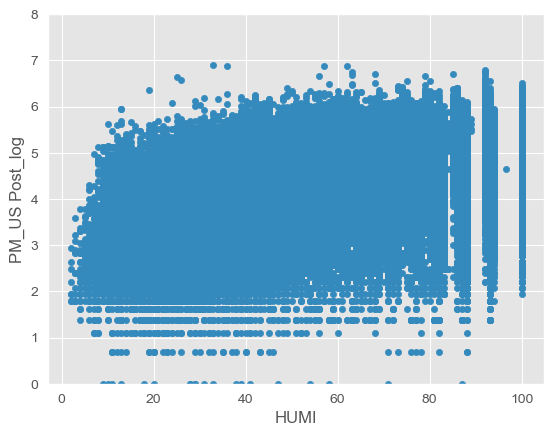

In [63]:
# HUMI
var = 'HUMI'
data = pd.concat([df_time_fill['PM_US Post_log'], df_time_fill[var]], axis=1)
data.plot.scatter(x=var, y='PM_US Post_log', ylim=(0, 8))

<AxesSubplot:xlabel='PRES', ylabel='PM_US Post_log'>

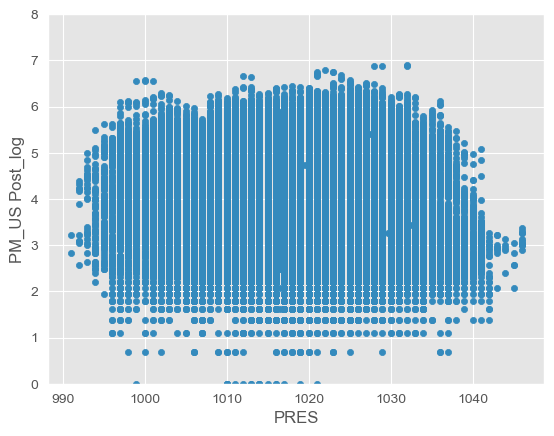

In [64]:
# PRES
var = 'PRES'
data = pd.concat([df_time_fill['PM_US Post_log'], df_time_fill[var]], axis=1)
data.plot.scatter(x=var, y='PM_US Post_log', ylim=(0, 8))

<AxesSubplot:xlabel='TEMP', ylabel='PM_US Post_log'>

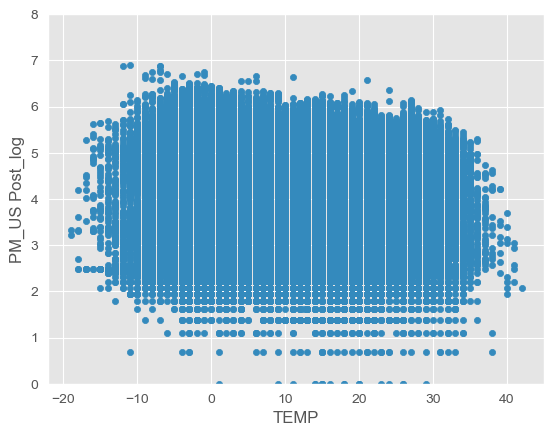

In [65]:
# TEMP
var = 'TEMP'
data = pd.concat([df_time_fill['PM_US Post_log'], df_time_fill[var]], axis=1)
data.plot.scatter(x=var, y='PM_US Post_log', ylim=(0, 8))

<AxesSubplot:xlabel='Iws', ylabel='PM_US Post_log'>

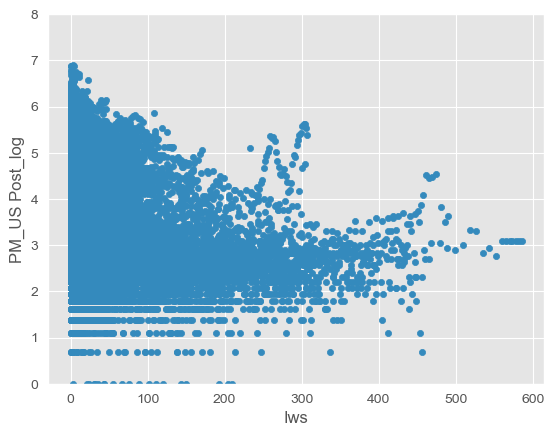

In [66]:
# Iws
var = 'Iws'
data = pd.concat([df_time_fill['PM_US Post_log'], df_time_fill[var]], axis=1)
data.plot.scatter(x=var, y='PM_US Post_log', ylim=(0, 8))

<AxesSubplot:xlabel='precipitation', ylabel='PM_US Post_log'>

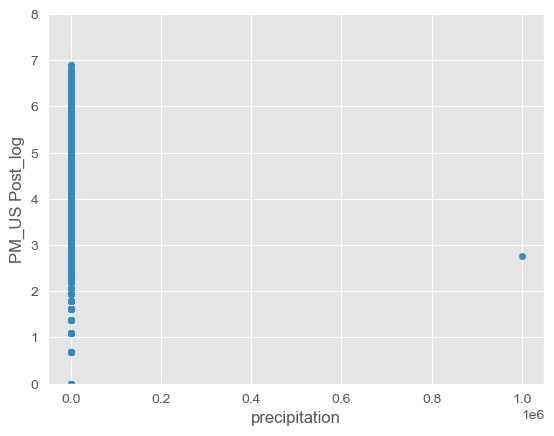

In [67]:
# precipitation
var = 'precipitation'
data = pd.concat([df_time_fill['PM_US Post_log'], df_time_fill[var]], axis=1)
data.plot.scatter(x=var, y='PM_US Post_log', ylim=(0, 8))

<AxesSubplot:xlabel='Iprec', ylabel='PM_US Post_log'>

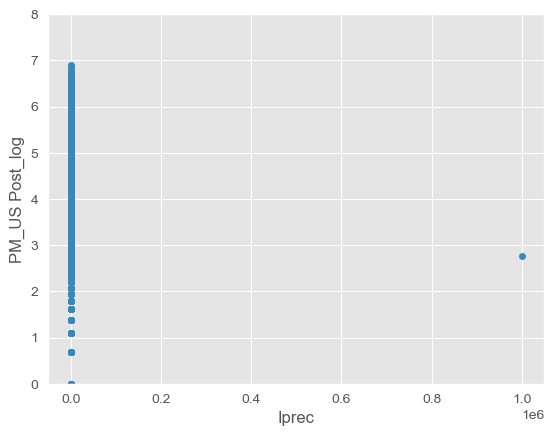

In [68]:
# Iprec
var = 'Iprec'
data = pd.concat([df_time_fill['PM_US Post_log'], df_time_fill[var]], axis=1)
data.plot.scatter(x=var, y='PM_US Post_log', ylim=(0, 8))

<AxesSubplot:>

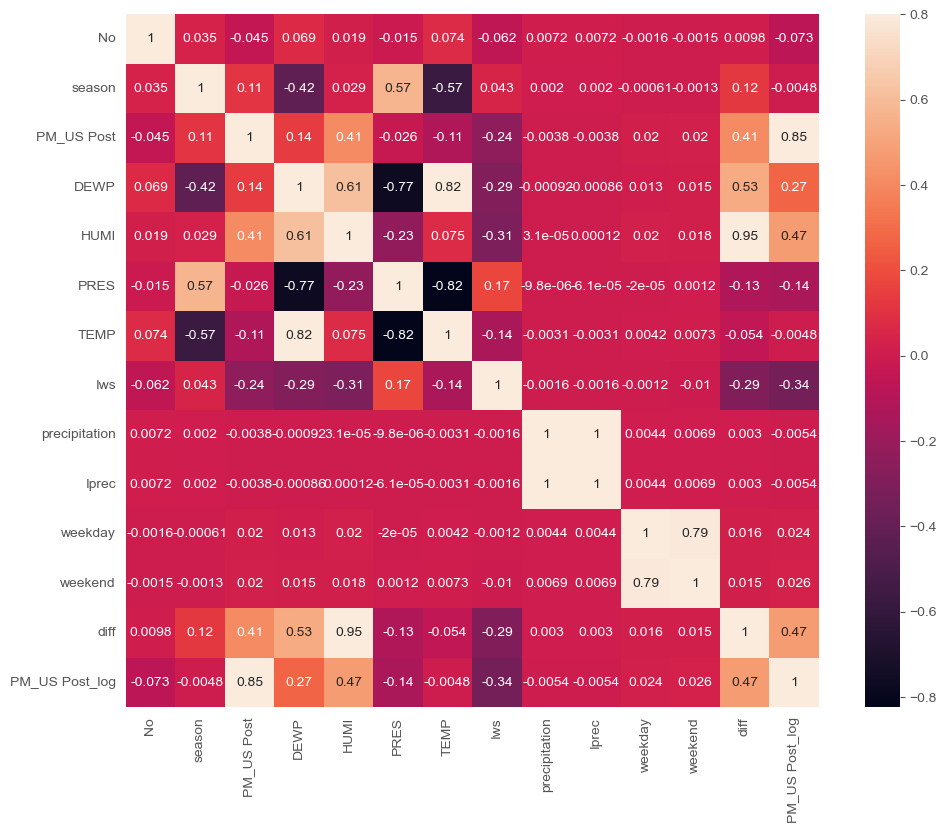

In [69]:
# 相关矩阵
corrmat = df_time_fill.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

从相关矩阵图中，我们可以观察到以下几点：

1. `PM_US Post`列与温度（`TEMP`）、露点（`DEWP`）、压力（`PRES`）、累积风速（`Iws`）、降水量（`precipitation`）、累积降水量（`Iprec`）以及各个风向（`cbwd_NE`，`cbwd_NW`，`cbwd_SE`，`cbwd_cv`）之间的相关性。

2. `PM_US Post`与`TEMP`（温度）和`DEWP`（露点）有一定程度的正相关性，这可能意味着在温度和露点高的时候PM2.5浓度也偏高。

3. `PM_US Post`与`PRES`（压力）有轻微的负相关性，表明压力增加可能会与PM2.5浓度降低相关。

4. 风速（`Iws`）与`PM_US Post`有较强的负相关性，表明风速增加可能有助于空气中PM2.5的扩散，从而降低测量值。

5. 各个风向（尤其是`cbwd_NW`）与`PM_US Post`也有不同程度的相关性，这可能表明特定风向与PM2.5浓度有关。

6. 日期和时间（`year`, `month`, `day`, `hour`）与`PM_US Post`的相关性不强，表明单纯时间因素对PM2.5浓度的影响不大。

Text(0.5, 1.0, 'PM_US Post Boxplot by hour')

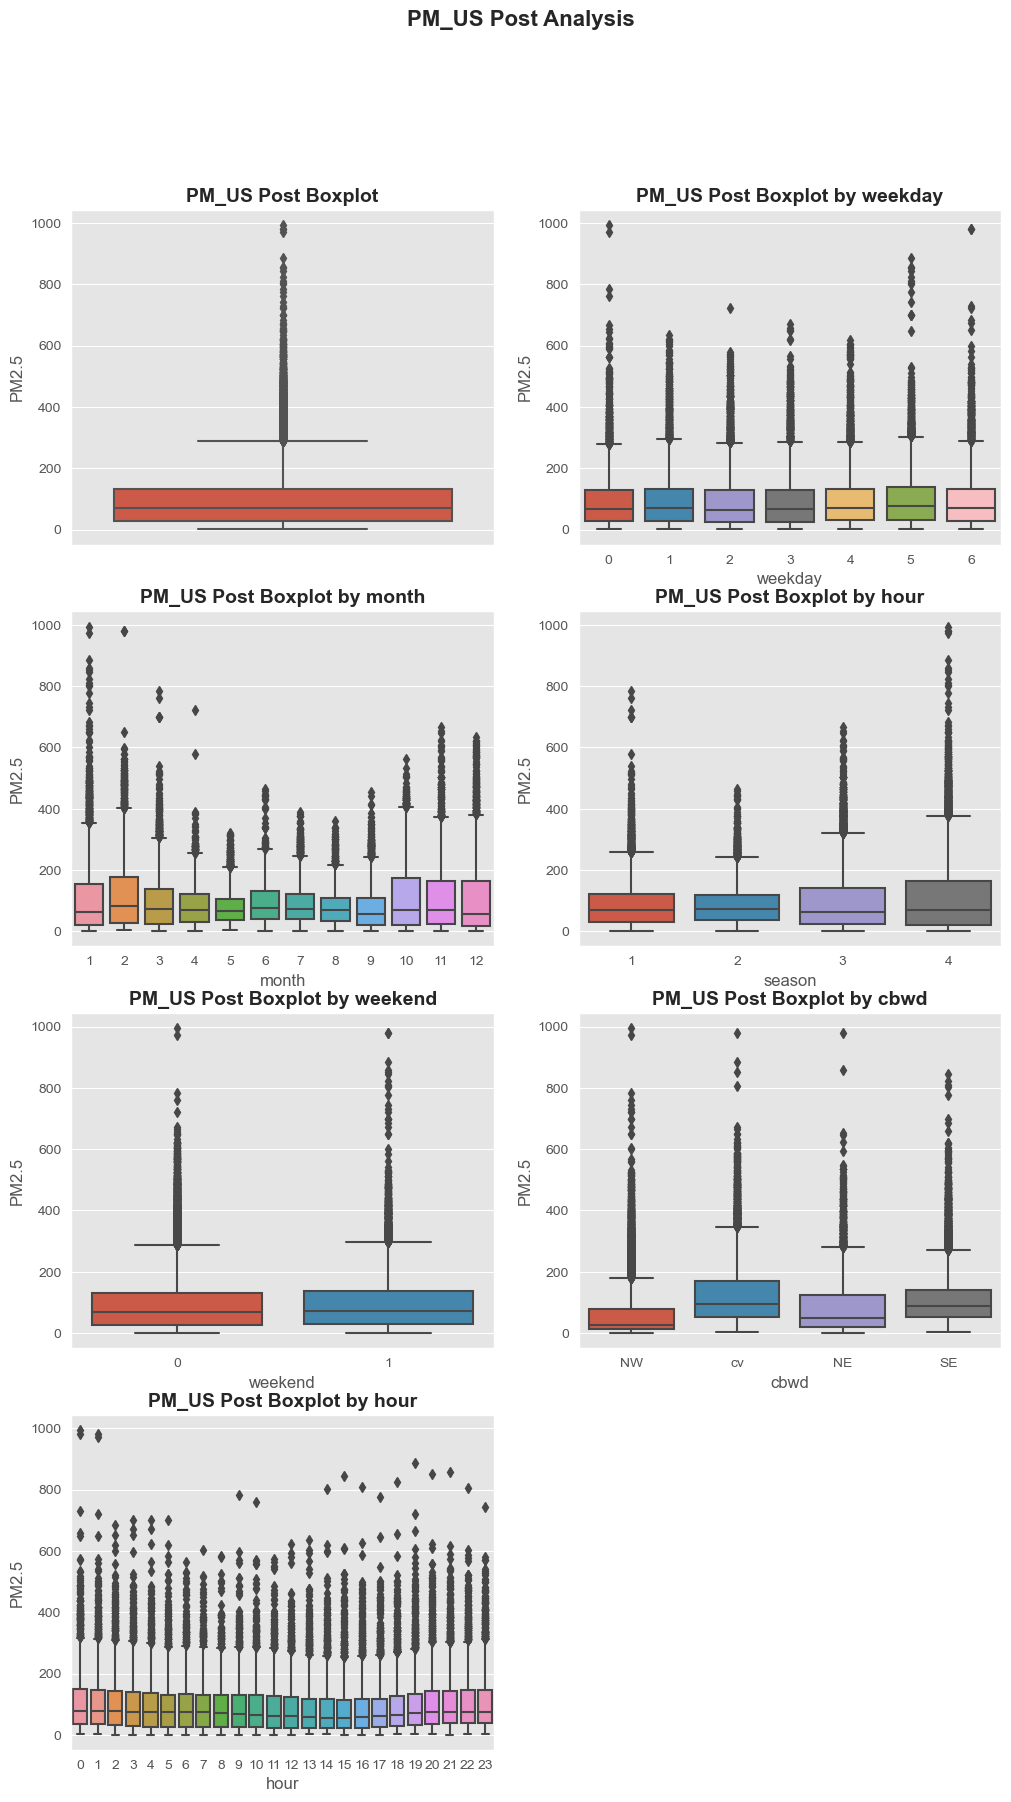

In [70]:
# 离散值对PM的影响
# 设置配色风格为ggplot，图片尺寸，标题字体
plt.style.use('ggplot')
fig = plt.figure(figsize = (12,20))
fig.suptitle('PM_US Post Analysis',fontsize = 16, fontweight = 'bold')

# 绘制各子图
ax1 = fig.add_subplot(421)
sns.boxplot(y = 'PM_US Post',data = df_time_fill,ax = ax1)
ax1.set(ylabel = 'PM2.5')
ax1.set_title('PM_US Post Boxplot',fontsize = 14, fontweight = 'bold')

ax2 = fig.add_subplot(422)
sns.boxplot(x = 'weekday',y = 'PM_US Post',data = df_time_fill,ax = ax2)
ax2.set(xlabel = 'weekday',ylabel = 'PM2.5')
ax2.set_title('PM_US Post Boxplot by weekday',fontsize = 14, fontweight = 'bold')

ax3 = fig.add_subplot(423)
sns.boxplot(x = 'month',y = 'PM_US Post',data = df_time_fill,ax = ax3)
ax3.set(xlabel = 'month',ylabel = 'PM2.5')
ax3.set_title('PM_US Post Boxplot by month',fontsize = 14, fontweight = 'bold')

ax4 = fig.add_subplot(424)
sns.boxplot(x = 'season',y = 'PM_US Post',data = df_time_fill,ax = ax4)
ax4.set(xlabel = 'season',ylabel = 'PM2.5')
ax4.set_title('PM_US Post Boxplot by hour',fontsize = 14, fontweight = 'bold')

ax5 = fig.add_subplot(425)
sns.boxplot(x = 'weekend',y = 'PM_US Post',data = df_time_fill,ax = ax5)
ax5.set(xlabel = 'weekend',ylabel = 'PM2.5')
ax5.set_title('PM_US Post Boxplot by weekend',fontsize = 14, fontweight = 'bold')

ax6 = fig.add_subplot(426)
sns.boxplot(x = 'cbwd',y = 'PM_US Post',data = df_time_fill,ax = ax6)
ax6.set(xlabel = 'cbwd',ylabel = 'PM2.5')
ax6.set_title('PM_US Post Boxplot by cbwd',fontsize = 14, fontweight = 'bold')

ax7 = fig.add_subplot(427)
sns.boxplot(x = 'hour',y = 'PM_US Post',data = df_time_fill,ax = ax7)
ax7.set(xlabel = 'hour',ylabel = 'PM2.5')
ax7.set_title('PM_US Post Boxplot by hour',fontsize = 14, fontweight = 'bold')

从上图可以看出：

Text(0.5, 1.0, 'Iws Boxplot by cbwd')

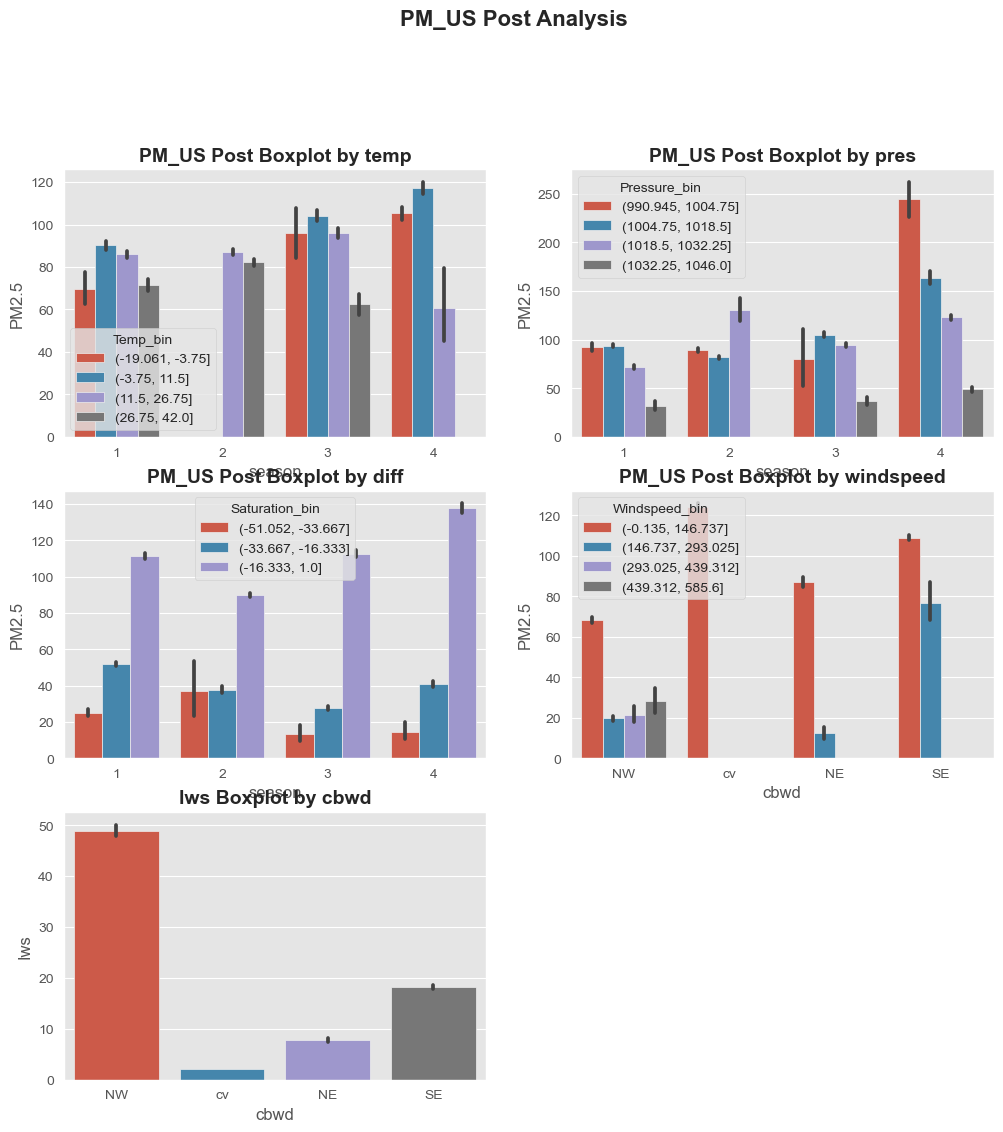

In [73]:
# 连续值对PM的影响

# 将连续数据分类
df_time_fill['Temp_bin'] = pd.cut(df_time_fill['TEMP'], bins=4)
df_time_fill['Pressure_bin'] = pd.cut(df_time_fill['PRES'], bins=4)
df_time_fill['Windspeed_bin'] = pd.cut(df_time_fill['Iws'], bins=4)
df_time_fill['Saturation_bin'] = pd.cut(df_time_fill['diff'], bins=3)

# 设置配色风格为ggplot，图片尺寸，标题字体
plt.style.use('ggplot')
fig = plt.figure(figsize = (12,16))
fig.suptitle('PM_US Post Analysis',fontsize = 16, fontweight = 'bold')

# 绘制各子图
ax1 = fig.add_subplot(421)
sns.barplot(x = 'season', y = 'PM_US Post',hue = 'Temp_bin', data = df_time_fill, ax = ax1)
ax1.set(ylabel = 'PM2.5')
ax1.set_title('PM_US Post Boxplot by temp',fontsize = 14, fontweight = 'bold')

ax2 = fig.add_subplot(422)
sns.barplot(x = 'season', y = 'PM_US Post',hue = 'Pressure_bin', data = df_time_fill, ax = ax2)
ax2.set(ylabel = 'PM2.5')
ax2.set_title('PM_US Post Boxplot by pres',fontsize = 14, fontweight = 'bold')

ax3 = fig.add_subplot(423)
sns.barplot(x = 'season', y = 'PM_US Post',hue = 'Saturation_bin', data = df_time_fill, ax = ax3)
ax3.set(ylabel = 'PM2.5')
ax3.set_title('PM_US Post Boxplot by diff',fontsize = 14, fontweight = 'bold')

ax4 = fig.add_subplot(424)
sns.barplot(x = 'cbwd', y = 'PM_US Post',hue = 'Windspeed_bin', data = df_time_fill, ax = ax4)
ax4.set(ylabel = 'PM2.5')
ax4.set_title('PM_US Post Boxplot by windspeed',fontsize = 14, fontweight = 'bold')

ax5 = fig.add_subplot(425)
sns.barplot(x = 'cbwd', y = 'Iws', data = df_time_fill, ax = ax5)
ax5.set(ylabel = 'Iws')
ax5.set_title('Iws Boxplot by cbwd',fontsize = 14, fontweight = 'bold')

从上图可以看出：

Text(0.5, 1.0, 'PM_US change with hour & weekend')

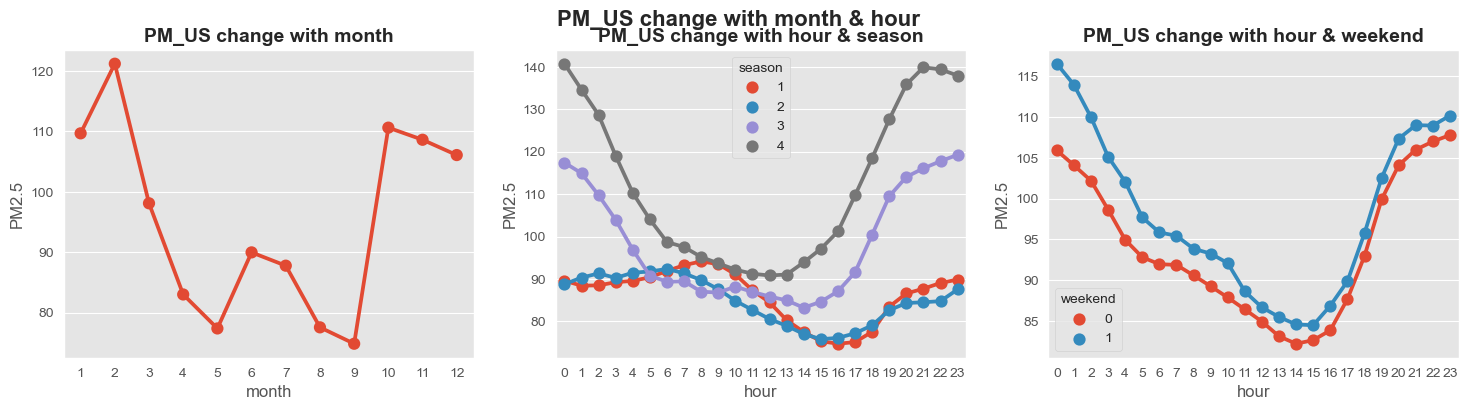

In [75]:
# PM2.5浓度随各月份及各时段的变化趋势
# 设置配色风格为ggplot，图片尺寸，标题字体
plt.style.use('ggplot')
fig = plt.figure(figsize = (18,4))
fig.suptitle('PM_US change with month & hour',fontsize = 16, fontweight = 'bold')

# 绘制各子图
ax1 = fig.add_subplot(131)
sns.pointplot(x = 'month', y = 'PM_US Post', data = df_time_fill, ax = ax1, ci = None)
ax1.set(ylabel = 'PM2.5')
ax1.set_title('PM_US change with month',fontsize = 14, fontweight = 'bold')

ax2 = fig.add_subplot(132)
sns.pointplot(x = 'hour', y = 'PM_US Post',hue = 'season', data = df_time_fill, ax = ax2, ci = None)
ax2.set(ylabel = 'PM2.5')
ax2.set_title('PM_US change with hour & season',fontsize = 14, fontweight = 'bold')

ax3 = fig.add_subplot(133)
sns.pointplot(x = 'hour', y = 'PM_US Post',hue = 'weekend', data = df_time_fill, ax = ax3, ci = None)
ax3.set(ylabel = 'PM2.5')
ax3.set_title('PM_US change with hour & weekend',fontsize = 14, fontweight = 'bold')

从上图可以看出：

In [77]:
# 将cbwd风向特征转换为数值型特征（独热编码）
df_time_fill = pd.get_dummies(df_time_fill, columns=['cbwd'])
df_time_fill.head()

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,...,PRES_bin,Iws_bin,Temp_bin,Pressure_bin,Windspeed_bin,Saturation_bin,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,4,129.0,-21.0,43.0,1021.0,...,"(1013.0, 1024.0]","(-0.135, 117.48]","(-19.061, -3.75]","(1018.5, 1032.25]","(-0.135, 146.737]","(-16.333, 1.0]",0,1,0,0
2010-01-01 01:00:00,2,2010,1,1,1,4,129.0,-21.0,47.0,1020.0,...,"(1013.0, 1024.0]","(-0.135, 117.48]","(-19.061, -3.75]","(1018.5, 1032.25]","(-0.135, 146.737]","(-16.333, 1.0]",0,1,0,0
2010-01-01 02:00:00,3,2010,1,1,2,4,129.0,-21.0,43.0,1019.0,...,"(1013.0, 1024.0]","(-0.135, 117.48]","(-19.061, -3.75]","(1018.5, 1032.25]","(-0.135, 146.737]","(-16.333, 1.0]",0,1,0,0
2010-01-01 03:00:00,4,2010,1,1,3,4,129.0,-21.0,55.0,1019.0,...,"(1013.0, 1024.0]","(-0.135, 117.48]","(-19.061, -3.75]","(1018.5, 1032.25]","(-0.135, 146.737]","(-16.333, 1.0]",0,1,0,0
2010-01-01 04:00:00,5,2010,1,1,4,4,129.0,-20.0,51.0,1018.0,...,"(1013.0, 1024.0]","(-0.135, 117.48]","(-19.061, -3.75]","(1004.75, 1018.5]","(-0.135, 146.737]","(-16.333, 1.0]",0,1,0,0


In [78]:
# 将df_time_fill数据集保存为csv文件
df_time_fill.to_csv('BeijingPMData/df_time_fill.csv')

## 总结

在本项目中，我们对北京市2008年至2015年的PM2.5浓度数据集进行了探索性数据分析（EDA），并对数据集进行了预处理。在EDA过程中，我们发现PM2.5浓度与温度、露点、压力、累积风速、降水量、累积降水量以及各个风向之间存在一定的相关性。此外，PM2.5浓度还与日期和时间（`year`, `month`, `day`, `hour`）之间存在一定的相关性。在预处理过程中，我们对缺失值进行了处理，并对数据集进行了标准化处理。在后续的机器学习建模中，我们将使用这个数据集进行PM2.5浓度的预测。